# Logistic回归

$\sigma(z)=\frac{1}{1+e^{-z}}$

In [1]:
import numpy as np

In [2]:
def sigmoid(X):
    return 1.0 / (1 + np.exp( - X))

In [3]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt').readlines()
    for line in fr:
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

## 梯度下降法

$\nabla{f(x,y)}=\left(\begin{align} \frac{\partial{f(x,y)}}{\partial{x}}\\\frac{\partial{f(x,y)}}{\partial{y}}\end{align}\right)$

$w:=w-\alpha{\nabla_w{f(w)}}$

In [4]:
def gradDescent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             
    labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):  
        h = sigmoid(dataMatrix * weights)  
        error = (h - labelMat)
        dw = dataMatrix.T * error
        weights -= alpha * dw
    return weights

In [5]:
dataArr, labelMat = loadDataSet()

In [6]:
weights = gradDescent(dataArr, labelMat)
weights

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

In [7]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]) 
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (- weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

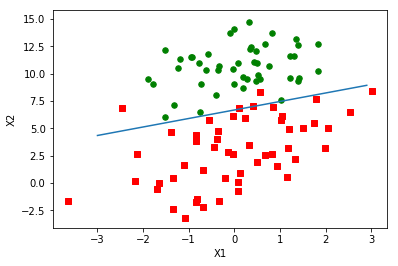

In [15]:
plotBestFit(weights)

## 随机梯度下降

In [9]:
def stocGradDescent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)  
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = h - classLabels[i] 
        weights -= alpha * error * dataMatrix[i]
    return weights

In [10]:
weights0 = stocGradDescent0(np.array(dataArr), labelMat)
weights0

array([ 1.01702007,  0.85914348, -0.36579921])

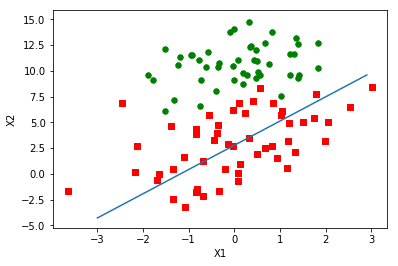

In [11]:
plotBestFit(weights0)

## 改进的梯度下降法

In [12]:
def stocGradDescent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)   
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.0001   
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = h - classLabels[randIndex] 
            weights -= alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [13]:
weights1 = stocGradDescent1(np.array(dataArr), labelMat)
weights1

array([14.87757305,  1.08631644, -2.00956818])

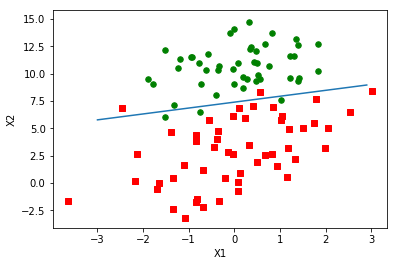

In [14]:
plotBestFit(weights1)

## 从疝气病症预测病马死亡率

### Logistic回归分类

In [20]:
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX * weights))
    if prob > 0.5: 
        return 1.0
    return 0.0

In [24]:
def colicTest():
    frTrain = open('horseColicTraining.txt').readlines()
    frTest = open('horseColicTest.txt').readlines()
    trainingSet = []
    trainingLabels = []
    for line in frTrain:
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradDescent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest:
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = float(errorCount) / numTestVec
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

In [22]:
def multiTest():
    numTests = 10
    errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum / float(numTests)))

In [25]:
multiTest()

the error rate of this test is: 0.447761
the error rate of this test is: 0.358209
the error rate of this test is: 0.283582
the error rate of this test is: 0.268657
the error rate of this test is: 0.328358
the error rate of this test is: 0.343284
the error rate of this test is: 0.358209
the error rate of this test is: 0.402985
the error rate of this test is: 0.402985
the error rate of this test is: 0.253731
after 10 iterations the average error rate is: 0.344776
